### Problem Statement: Predicting Beats per Minutes in a song.
### Algorithm used: Linear Regression. L1 and L2 for Hyperparameter Tuning,PCA for feature selection, SVR ,knn regresor, random forest ,Feed-Forward Neural Network, CNN , Gradient Boosting and Stacking

## Importing Libraries and Datasets

In [208]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error,mean_absolute_error

In [120]:
#Loading datasets
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

In [123]:
train_data = train_data.drop(columns = ['id'])
test_data = test_data.drop(columns = ['id'])

## Train Data Preprocessing

In [125]:
#Checking info of train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float64
 1   AudioLoudness              524164 non-null  float64
 2   VocalContent               524164 non-null  float64
 3   AcousticQuality            524164 non-null  float64
 4   InstrumentalScore          524164 non-null  float64
 5   LivePerformanceLikelihood  524164 non-null  float64
 6   MoodScore                  524164 non-null  float64
 7   TrackDurationMs            524164 non-null  float64
 8   Energy                     524164 non-null  float64
 9   BeatsPerMinute             524164 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


In [126]:
#checking null entries
train_data.isna().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [127]:
train_data.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [128]:
#Checking Maximum and Minimum of the y variable
max_beats = train_data["BeatsPerMinute"].max()
min_beats = train_data["BeatsPerMinute"].min()

print(f"Max Beats: {max_beats} \n" f"Min Beats: {min_beats}")

Max Beats: 206.037 
Min Beats: 46.718


In [263]:
#cxheaking column names
train_data.columns

Index(['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
       'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
       'TrackDurationMs', 'Energy', 'BeatsPerMinute'],
      dtype='object')

In [264]:
#Max and Min values of the each column
columns = train_data.columns
train_data_max_value = train_data[columns].max()
train_data_min_value = train_data[columns].min()
print(f"Max Values: \n{train_data_max_value}\n",f"\nMin Value \n{train_data_min_value}")

Max Values: 
RhythmScore                       0.975000
AudioLoudness                          NaN
VocalContent                      0.078705
AcousticQuality                   0.103738
InstrumentalScore                 0.107391
LivePerformanceLikelihood         0.106549
MoodScore                         0.978000
TrackDurationMs              464723.228100
Energy                            0.526589
BeatsPerMinute                  206.037000
dtype: float64
 
Min Value 
RhythmScore                      0.076900
AudioLoudness                         NaN
VocalContent                     0.019409
AcousticQuality                  0.000005
InstrumentalScore                0.000001
LivePerformanceLikelihood        0.020357
MoodScore                        0.025600
TrackDurationMs              63973.000000
Energy                           0.000067
BeatsPerMinute                  46.718000
dtype: float64


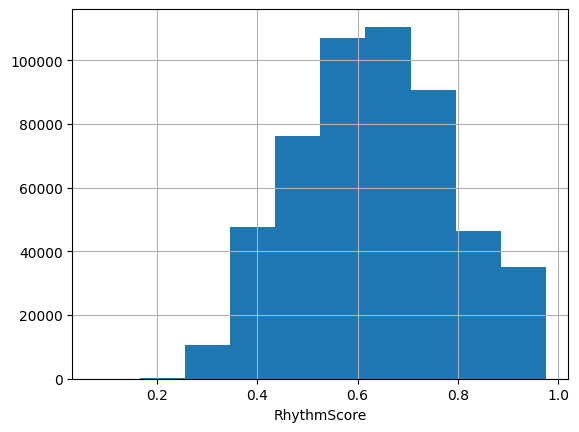

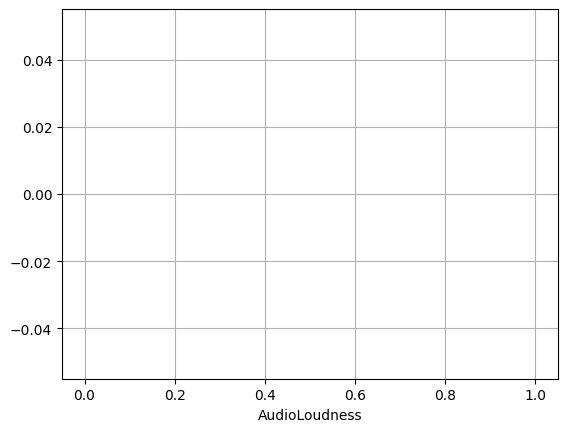

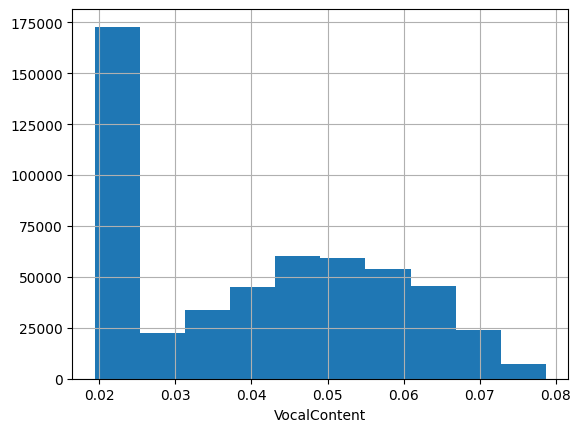

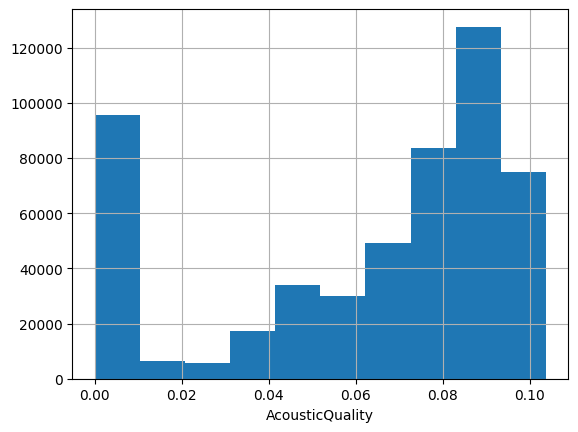

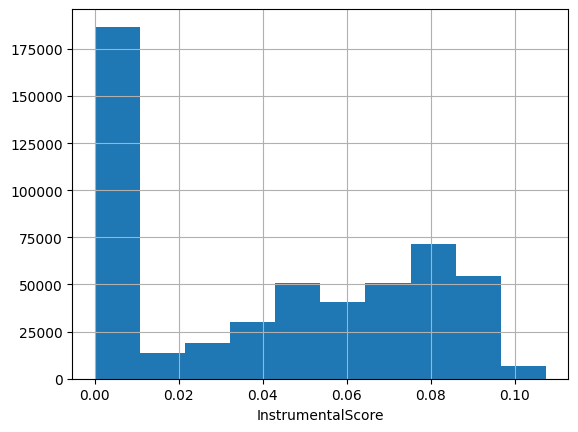

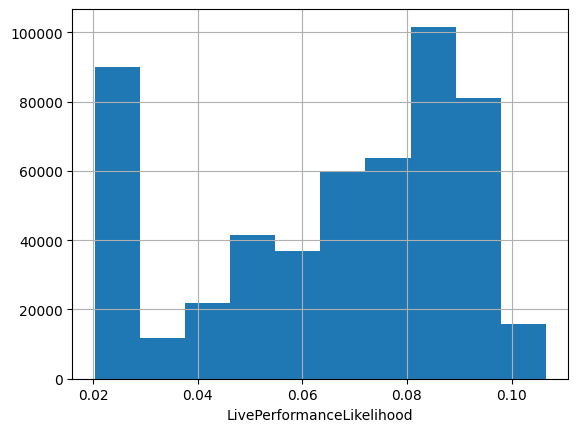

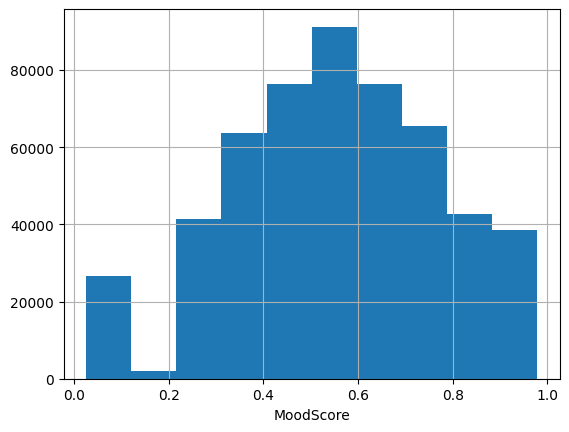

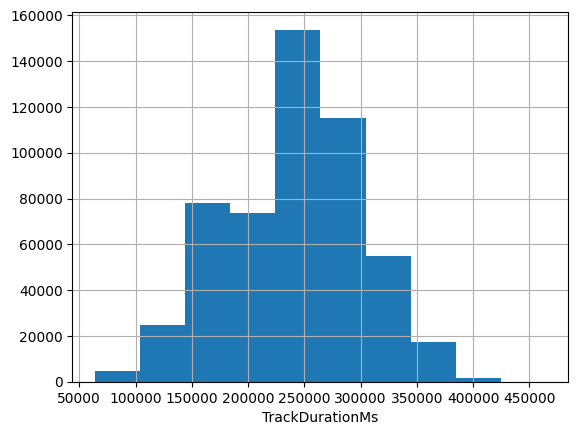

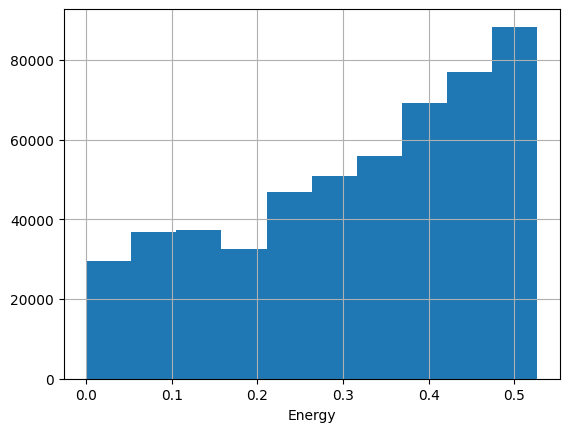

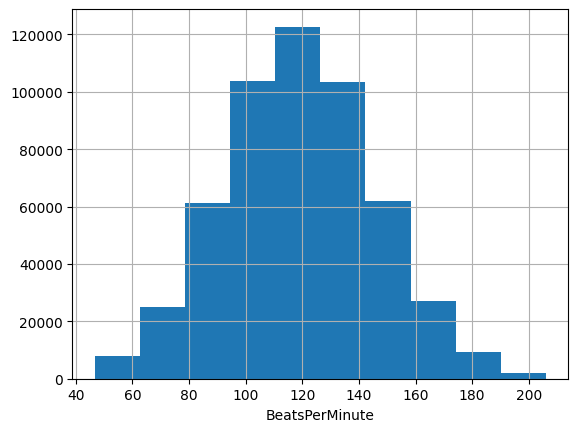

In [265]:
#checking data distribution
for columns in train_data.columns:
    plt.figure()
    train_data[columns].hist()
    plt.xlabel(columns)
plt.show()

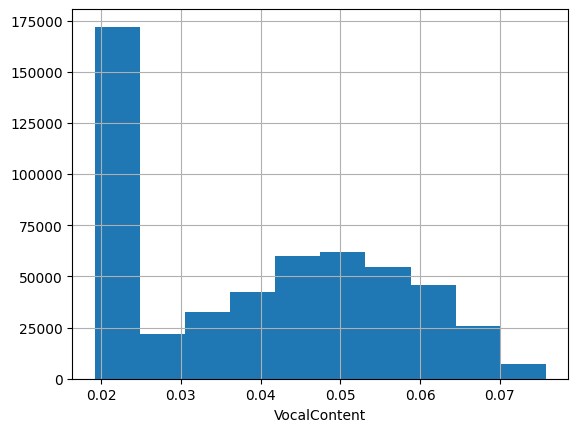

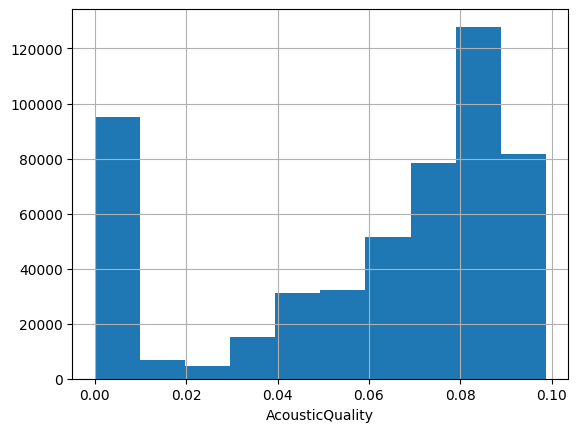

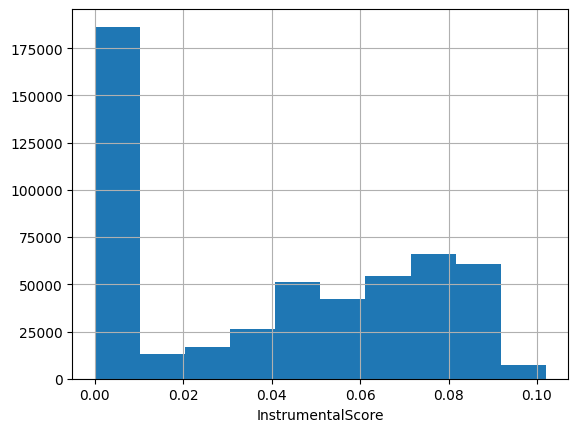

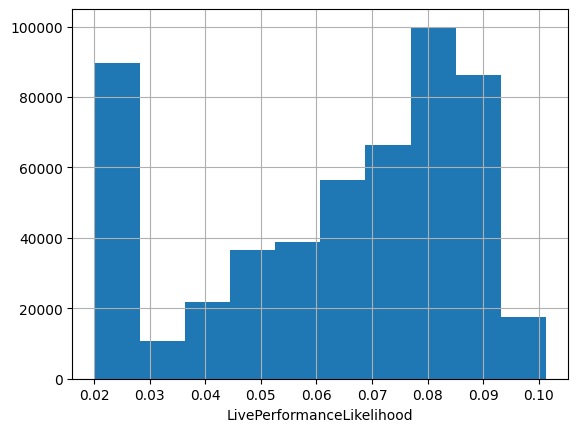

Max Values: 
RhythmScore                       0.975000
AudioLoudness                          NaN
VocalContent                      0.075761
AcousticQuality                   0.098703
InstrumentalScore                 0.102007
LivePerformanceLikelihood         0.101246
MoodScore                         0.978000
TrackDurationMs              464723.228100
Energy                            0.526589
BeatsPerMinute                  206.037000
dtype: float64
 
Min Value 
RhythmScore                      0.076900
AudioLoudness                         NaN
VocalContent                     0.019223
AcousticQuality                  0.000005
InstrumentalScore                0.000001
LivePerformanceLikelihood        0.020153
MoodScore                        0.025600
TrackDurationMs              63973.000000
Energy                           0.000067
BeatsPerMinute                  46.718000
dtype: float64


In [266]:
skewed_features = ['VocalContent', 'AcousticQuality', 'InstrumentalScore', 'LivePerformanceLikelihood']
for cols in skewed_features:
    train_data[cols] = np.log1p(train_data[cols])
    plt.figure()
    train_data[cols].hist()
    plt.xlabel(cols)
plt.show()
#Max and Min values of the each column
columns = train_data.columns
train_data_max_value = train_data[columns].max()
train_data_min_value = train_data[columns].min()
print(f"Max Values: \n{train_data_max_value}\n",f"\nMin Value \n{train_data_min_value}")

In [280]:
train_data  = train_data.drop(columns = ["AudioLoudness"])

In [281]:
#Splitting dataset X and y
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,:1]
print(X_train.shape,y_train.shape)

(524164, 8) (524164, 1)


In [282]:
#Splitying training dataset into training and validation dataset
X_train,x_val,y_train,y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state =42) 
X_train.shape,x_val.shape,y_train.shape,y_val.shape

((419331, 8), (104833, 8), (419331, 1), (104833, 1))

In [283]:
#Standard Scaler
st = StandardScaler()
st

StandardScaler()

In [285]:
scaled_X_train = st.fit_transform(X_train)
scaled_x_val = st.fit_transform(x_val)

## Test Data Processing

In [261]:
#Checking test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                174722 non-null  float64
 1   AudioLoudness              174722 non-null  float64
 2   VocalContent               174722 non-null  float64
 3   AcousticQuality            174722 non-null  float64
 4   InstrumentalScore          174722 non-null  float64
 5   LivePerformanceLikelihood  174722 non-null  float64
 6   MoodScore                  174722 non-null  float64
 7   TrackDurationMs            174722 non-null  float64
 8   Energy                     174722 non-null  float64
dtypes: float64(9)
memory usage: 12.0 MB


In [262]:
#checking test data null entries
test_data.isna().sum()

RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
dtype: int64

In [219]:
test_data.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,0.410013,-16.794967,0.021037,0.109066,0.011933,0.117043,0.664321,302901.5498,0.424867
1,0.463071,-1.357000,0.083584,0.044880,0.114374,0.065883,0.829552,221995.6643,0.846000
2,0.686569,-3.368928,0.092092,0.120036,0.103899,0.126372,0.304978,357724.0127,0.134067
3,0.885793,-5.598049,0.074830,0.000005,0.133625,0.080941,0.487740,271790.3989,0.316467
4,0.637391,-7.068160,0.077818,0.150433,0.051402,0.021676,0.591248,277728.5383,0.481067


In [233]:
#Checking Maximum and Minimum of the y variable
cols = test_data.columns
max_beats = test_data[cols].max()
min_beats = test_data[cols].min()

print(f"Max Beats:\n{max_beats} \n" f"\nMin Beats: \n{min_beats}")

Max Beats:
RhythmScore                       0.975000
AudioLoudness                    -1.357000
VocalContent                      0.108458
AcousticQuality                   0.160975
InstrumentalScore                 0.148764
LivePerformanceLikelihood         0.144167
MoodScore                         0.978000
TrackDurationMs              449288.808400
Energy                            0.999867
dtype: float64 

Min Beats: 
RhythmScore                      0.140859
AudioLoudness                  -27.442731
VocalContent                     0.020819
AcousticQuality                  0.000005
InstrumentalScore                0.000001
LivePerformanceLikelihood        0.021445
MoodScore                        0.025600
TrackDurationMs              63973.000000
Energy                           0.000067
dtype: float64


In [ ]:
scaled_X_train = st.fit_transform(X_train)
scaled_x_val = st.fit_transform(x_val)
scaled_X_train.shape,scaled_x_val.shape

## Multi Linear Regression Model

In [286]:
#Linear Regression model on train data
lr = LinearRegression()
lr

LinearRegression()

In [287]:
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [288]:
predict = lr.predict(scaled_x_val)

In [289]:
print(r2_score(y_val,predict),mean_absolute_error(y_val,predict), mean_squared_error(y_val,predict))

0.9999960377999586 0.0002549031336517267 9.785002527429607e-08


In [290]:
lr.coef_

array([[ 1.56836431e-01, -3.61660740e-17, -2.55064815e-17,
        -1.62543356e-17, -1.41399578e-17,  8.63501610e-17,
         2.90535920e-17, -2.15377065e-17]])